In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
unique_subjectivity_values = user['Sentiment_Subjectivity'].unique()
print(unique_subjectivity_values)


NameError: name 'user' is not defined

In [ ]:
unique_installs = app['Reviews'].unique()
print(unique_installs)


In [ ]:
# Select rows where 'Rating' column contains NaN
nan_ratings = app[app['Content Rating'].isnull()]

# Display the first few rows where 'Rating' is NaN with styled formatting
styled_nan_ratings = nan_ratings.style.set_properties(**{'background-color': 'lightblue', 
                                                               'color': 'black', 
                                                               'border': '1px solid black'})

# Render the styled output
styled_nan_ratings


In [5]:
everyone_rows_count = len(app[app['Price'] == 'Everyone'])
print("Total rows where 'Everyone' occurred in the 'Price' column:", everyone_rows_count)
everyone_rows = app[app['Price'] == 'Everyone']

# Display the rows where 'Everyone' occurred in the 'Price' column
print(everyone_rows)

Total rows where 'Everyone' occurred in the 'Price' column: 1
                                           App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN  


In [6]:
app=pd.read_csv("googleplaystore.csv")
user=pd.read_csv("googleplaystore_user_reviews.csv")
app.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
app.info()#
#check data types and number of values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
app['Reviews'] = pd.to_numeric(app['Reviews'], errors='coerce')
# Convert Last Updated to datetime with handling for errors
app['Last Updated'] = pd.to_datetime(app['Last Updated'], errors='coerce')
app.drop_duplicates(inplace=True)

 #Clean 'Installs' column to retain only numeric parts
app['Installs'] = app['Installs'].str.replace(',', '').str.replace('+', '').str.replace('Free', '0')

# Convert the 'Installs' column to numeric
app['Installs'] = pd.to_numeric(app['Installs'], errors='coerce')

app['Size'] = app['Size'].str.replace('k', 'e-3').str.replace('M', 'e0').str.replace(',', '')

# Convert sizes to numeric values
app['Size'] = pd.to_numeric(app['Size'], errors='coerce')
# Calculate the median of numeric values
median_value = app['Size'].median()

# Replace 'Varies with device' with the median
app['Size'] = app['Size'].fillna(median_value)

# Filter rows where 'Everyone' occurs in the 'Price' column and keep the inverse
app = app[app['Price'] != 'Everyone']

# Remove the dollar signs ('$') from the 'Price' column
app['Price'] = app['Price'].str.replace('$', '')

# Convert the 'Price' column to float
app['Price'] = app['Price'].astype(float)

# Calculate the median of the 'Rating' column
rating_median = app['Rating'].median()

# Fill missing values in 'Rating' with the median
app['Rating'].fillna(rating_median, inplace=True)



In [9]:
# Drop rows with missing values in these columns
app.dropna(subset=['Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver',"Type"], inplace=True)


In [10]:
app.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10346 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10346 non-null  object        
 1   Category        10346 non-null  object        
 2   Rating          10346 non-null  float64       
 3   Reviews         10346 non-null  float64       
 4   Size            10346 non-null  float64       
 5   Installs        10346 non-null  int64         
 6   Type            10346 non-null  object        
 7   Price           10346 non-null  float64       
 8   Content Rating  10346 non-null  object        
 9   Genres          10346 non-null  object        
 10  Last Updated    10346 non-null  datetime64[ns]
 11  Current Ver     10346 non-null  object        
 12  Android Ver     10346 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 1.1+ MB


In [11]:
app.describe()

,Rating,Reviews,Size,Installs,Price,Last Updated
count,10346.00000,1.034600e+04,10346.000000,1.034600e+04,10346.000000,10346
mean,4.20377,4.063338e+05,20.082218,1.417266e+07,1.031561,2017-11-14 14:51:45.200077312
min,1.00000,0.000000e+00,0.008500,0.000000e+00,0.000000,2010-05-21 00:00:00
25%,4.10000,3.200000e+01,5.700000,1.000000e+03,0.000000,2017-09-04 06:00:00
50%,4.30000,1.688500e+03,13.000000,1.000000e+05,0.000000,2018-05-20 00:00:00
75%,4.50000,4.659825e+04,26.000000,1.000000e+06,0.000000,2018-07-19 00:00:00
max,5.00000,7.815831e+07,100.000000,1.000000e+09,400.000000,2018-08-08 00:00:00
std,0.48573,2.698179e+06,21.024764,8.028090e+07,16.287252,NaN


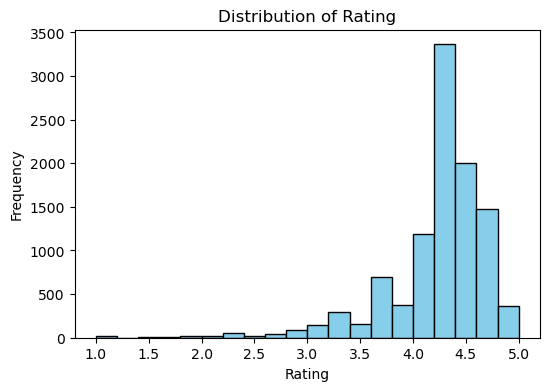

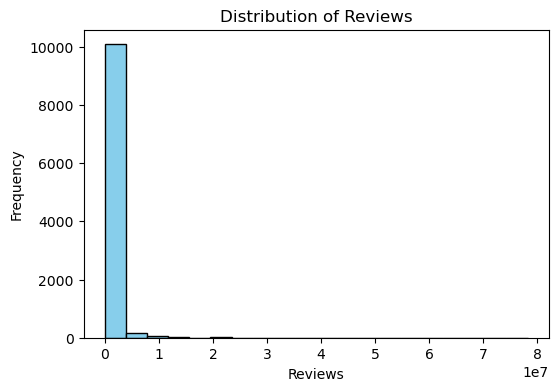

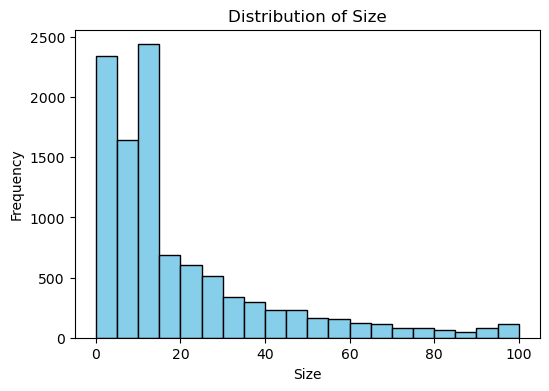

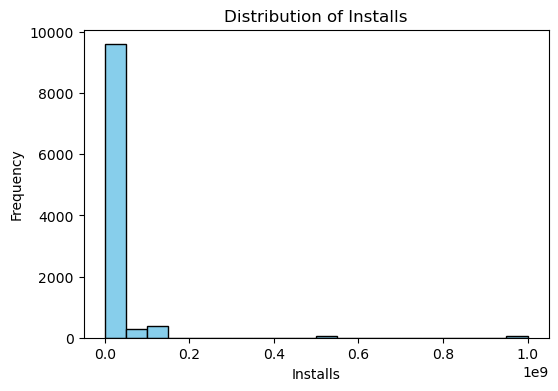

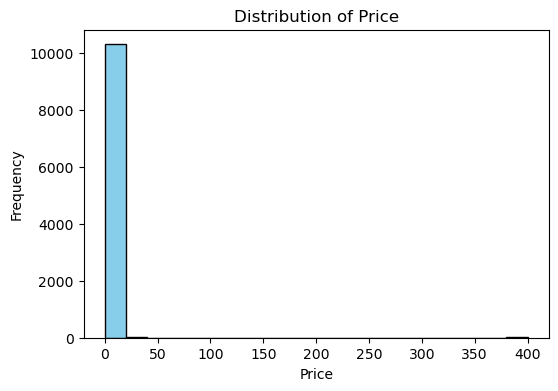

In [12]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = app.select_dtypes(include=['float64', 'int64'])

# Plot histograms for numeric columns
for column in numeric_columns.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(app[column], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    plt.show()


In [13]:
Q1 = app['Reviews'].quantile(0.25)
Q3 = app['Reviews'].quantile(0.75)
IQR = Q3 - Q1
outliers = app[(app['Reviews'] < Q1 - 1.5 * IQR) | (app['Reviews'] > Q3 + 1.5 * IQR)]

print(outliers)


                                                     App        Category  \
3                                  Sketch - Draw & Paint  ART_AND_DESIGN   
18                         FlipaClip - Cartoon animation  ART_AND_DESIGN   
19                                          ibis Paint X  ART_AND_DESIGN   
42                            Textgram - write on photos  ART_AND_DESIGN   
45     Canva: Poster, banner, card maker & graphic de...  ART_AND_DESIGN   
...                                                  ...             ...   
10740                                         PhotoFunia     PHOTOGRAPHY   
10781                               Modern Strike Online            GAME   
10784                                         Big Hunter            GAME   
10809              Castle Clash: RPG War and Strategy FR          FAMILY   
10840      iHoroscope - 2018 Daily Horoscope & Astrology       LIFESTYLE   

       Rating   Reviews  Size  Installs  Type  Price Content Rating  \
3         4.5  2

In [14]:
app.describe()

,Rating,Reviews,Size,Installs,Price,Last Updated
count,10346.00000,1.034600e+04,10346.000000,1.034600e+04,10346.000000,10346
mean,4.20377,4.063338e+05,20.082218,1.417266e+07,1.031561,2017-11-14 14:51:45.200077312
min,1.00000,0.000000e+00,0.008500,0.000000e+00,0.000000,2010-05-21 00:00:00
25%,4.10000,3.200000e+01,5.700000,1.000000e+03,0.000000,2017-09-04 06:00:00
50%,4.30000,1.688500e+03,13.000000,1.000000e+05,0.000000,2018-05-20 00:00:00
75%,4.50000,4.659825e+04,26.000000,1.000000e+06,0.000000,2018-07-19 00:00:00
max,5.00000,7.815831e+07,100.000000,1.000000e+09,400.000000,2018-08-08 00:00:00
std,0.48573,2.698179e+06,21.024764,8.028090e+07,16.287252,NaN


In [28]:
app.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10346 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10346 non-null  object        
 1   Category        10346 non-null  object        
 2   Rating          10346 non-null  float64       
 3   Reviews         10346 non-null  float64       
 4   Size            10346 non-null  float64       
 5   Installs        10346 non-null  int64         
 6   Type            10346 non-null  object        
 7   Price           10346 non-null  float64       
 8   Content Rating  10346 non-null  object        
 9   Genres          10346 non-null  object        
 10  Last Updated    10346 non-null  datetime64[ns]
 11  Current Ver     10346 non-null  object        
 12  Android Ver     10346 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 1.1+ MB


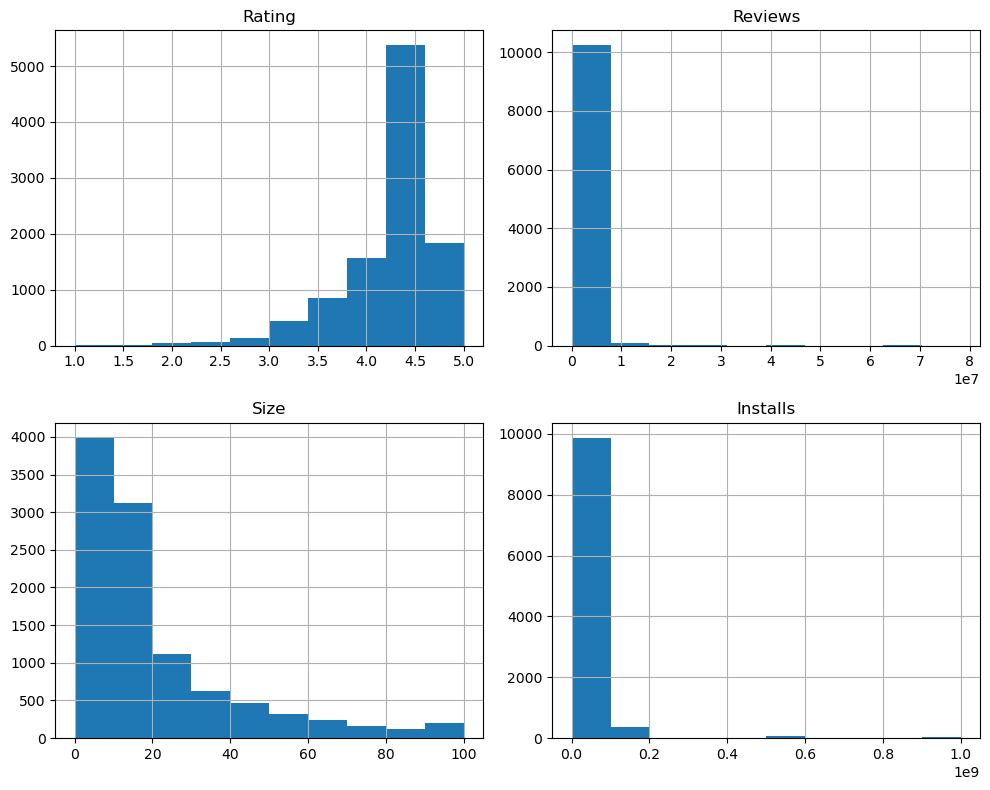

In [29]:
import matplotlib.pyplot as plt

# Histograms for 'Rating', 'Reviews', 'Size', and 'Installs'
app[['Rating', 'Reviews', 'Size', 'Installs']].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


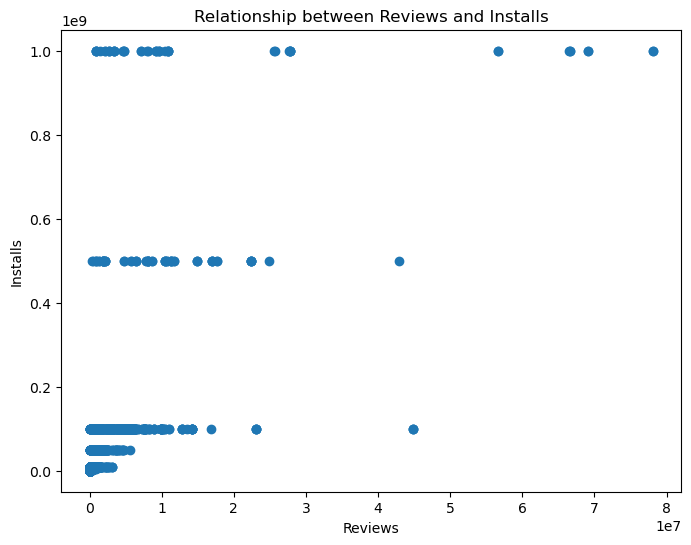

In [30]:
# Scatter plot between 'Reviews' and 'Installs'
plt.figure(figsize=(8, 6))
plt.scatter(app['Reviews'], app['Installs'])
plt.xlabel('Reviews')
plt.ylabel('Installs')
plt.title('Relationship between Reviews and Installs')
plt.show()


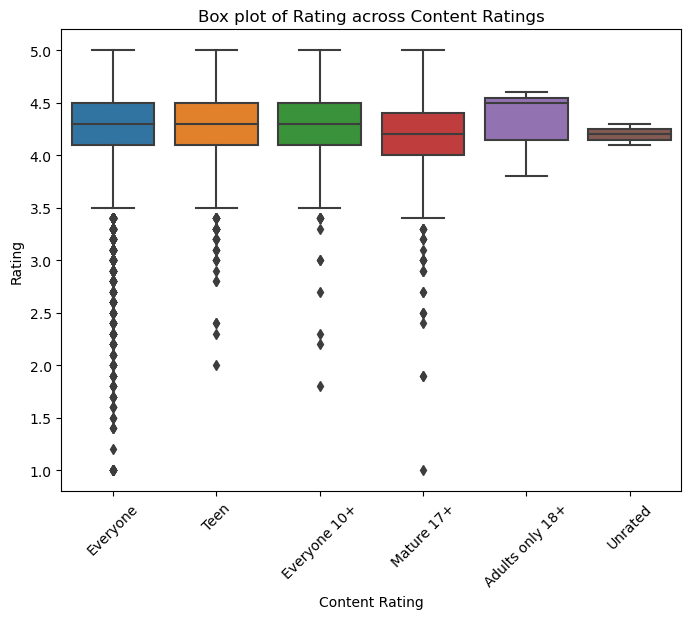

In [31]:
import seaborn as sns

# Box plot for 'Rating' across different 'Content Ratings'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Content Rating', y='Rating', data=app)
plt.title('Box plot of Rating across Content Ratings')
plt.xticks(rotation=45)
plt.show()


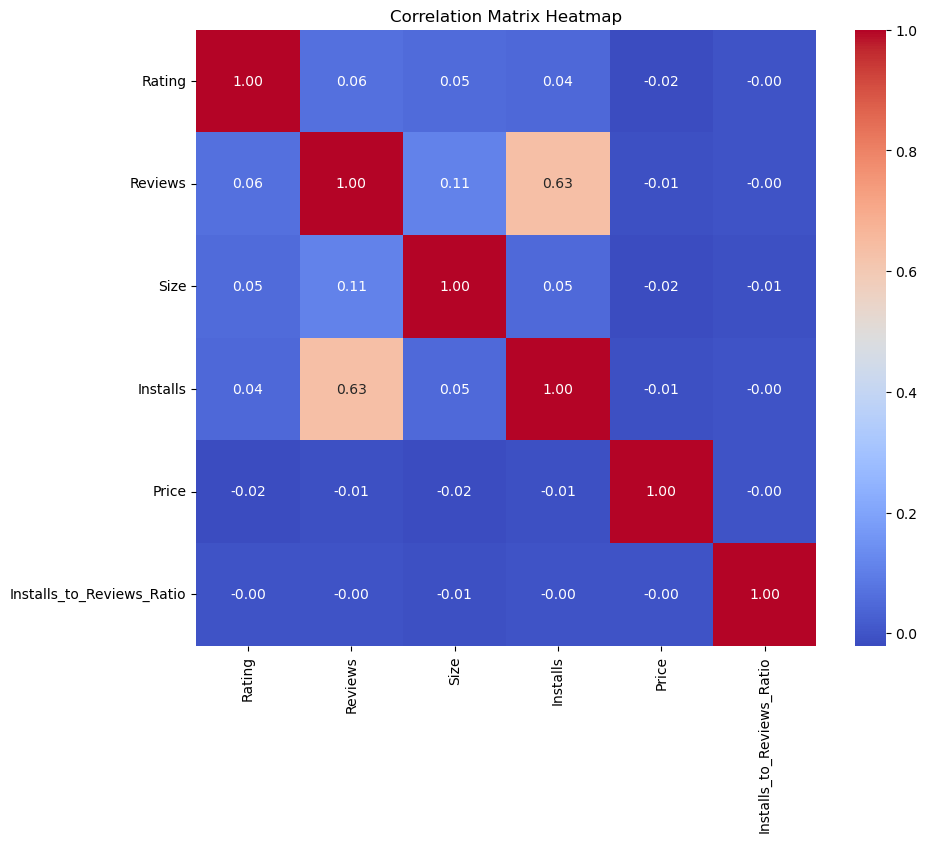

In [34]:
# Selecting only numeric columns for correlation matrix
numeric_columns = app.select_dtypes(include=['float64', 'int64']).columns

# Calculating correlation matrix
correlation_matrix = app[numeric_columns].corr()

# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [33]:
app['Installs_to_Reviews_Ratio'] = app['Installs'] / app['Reviews']
app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_to_Reviews_Ratio
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,62.893082
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,517.063082
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,57.136327
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,231.863627
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,103.412616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,131.578947
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,25.000000
10838,Parkinson Exercices FR,MEDICAL,4.3,3.0,9.5,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,333.333333
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,13.0,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,8.771930


In [16]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [17]:
user

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [18]:
user = user.drop_duplicates()
# Drop rows where 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
# and 'Sentiment_Subjectivity' columns have NaN values simultaneously
user.dropna(subset=['Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity'], how='any', inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_5544\1512678453.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user.dropna(subset=['Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity'], how='any', inplace=True)


In [19]:
user

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In [20]:
for column in user:
    print("Column"," ",column,"  uniquevalue are :", user[column].nunique())
    print(user[column].unique())
    print("-------------------------")

Column   App   uniquevalue are : 865
['10 Best Foods for You' '104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室' '11st'
 '1800 Contacts - Lens Store' '1LINE – One Line with One Touch'
 '2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif'
 '21-Day Meditation Experience' '2Date Dating App, Love and matching'
 '2GIS: directory & navigator' '2RedBeans' '2ndLine - Second Phone Number'
 '30 Day Fitness Challenge - Workout at Home' '365Scores - Live Scores'
 '3D Live Neon Weed Launcher' '4 in a Row'
 '4K Wallpapers and Ultra HD Backgrounds'
 '591房屋交易-租屋、中古屋、新建案、實價登錄、別墅透天、公寓套房、捷運、買房賣房行情、房價房貸查詢' '591房屋交易-香港'
 '7 Cups: Anxiety & Stress Chat' '7 Day Food Journal Challenge'
 '7 Minute Workout' '7 Weeks - Habit & Goal Tracker' '8 Ball Pool'
 '850 Sports News Digest' '8fit Workouts & Meal Planner'
 '95Live -SG#1 Live Streaming App' 'A Call From Santa Claus!'
 'A Word A Day' 'A&E - Watch Full Episodes of TV Shows'
 'A+ Gallery - Photos & Videos' 'A+ Mobile' 'ABC Kids - Tracing & Phonics'
 'ABC News - US & World News' 

In [21]:
for column in user:
    print( "column name:", column, "- misisng values ",user[column].isnull().sum())
    print("------------------------------------------------------------------")

column name: App - misisng values  0
------------------------------------------------------------------
column name: Translated_Review - misisng values  0
------------------------------------------------------------------
column name: Sentiment - misisng values  0
------------------------------------------------------------------
column name: Sentiment_Polarity - misisng values  0
------------------------------------------------------------------
column name: Sentiment_Subjectivity - misisng values  0
------------------------------------------------------------------


In [22]:
user.dropna(inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_5544\2884781195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user.dropna(inplace=True)


In [23]:
for column in user:
    print( "column name:", column, "- misisng values ",user[column].isnull().sum())
    print("------------------------------------------------------------------")

column name: App - misisng values  0
------------------------------------------------------------------
column name: Translated_Review - misisng values  0
------------------------------------------------------------------
column name: Sentiment - misisng values  0
------------------------------------------------------------------
column name: Sentiment_Polarity - misisng values  0
------------------------------------------------------------------
column name: Sentiment_Subjectivity - misisng values  0
------------------------------------------------------------------


In [24]:
user.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29692 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


In [25]:
Q1_polarity = user['Sentiment_Polarity'].quantile(0.25)
Q3_polarity = user['Sentiment_Polarity'].quantile(0.75)
IQR_polarity = Q3_polarity - Q1_polarity

lower_bound_polarity = Q1_polarity - 1.5 * IQR_polarity
upper_bound_polarity = Q3_polarity + 1.5 * IQR_polarity

outliers_polarity = user[(user['Sentiment_Polarity'] < lower_bound_polarity) | (user['Sentiment_Polarity'] > upper_bound_polarity)]

Q1_subjectivity = user['Sentiment_Subjectivity'].quantile(0.25)
Q3_subjectivity = user['Sentiment_Subjectivity'].quantile(0.75)
IQR_subjectivity = Q3_subjectivity - Q1_subjectivity

lower_bound_subjectivity = Q1_subjectivity - 1.5 * IQR_subjectivity
upper_bound_subjectivity = Q3_subjectivity + 1.5 * IQR_subjectivity

outliers_subjectivity = user[(user['Sentiment_Subjectivity'] < lower_bound_subjectivity) | (user['Sentiment_Subjectivity'] > upper_bound_subjectivity)]

# Removing outliers for Sentiment_Polarity
user = user[~((user['Sentiment_Polarity'] < lower_bound_polarity) | (user['Sentiment_Polarity'] > upper_bound_polarity))]

# Removing outliers for Sentiment_Subjectivity
user = user[~((user['Sentiment_Subjectivity'] < lower_bound_subjectivity) | (user['Sentiment_Subjectivity'] > upper_bound_subjectivity))]


In [26]:
user.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29105 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29105 non-null  object 
 1   Translated_Review       29105 non-null  object 
 2   Sentiment               29105 non-null  object 
 3   Sentiment_Polarity      29105 non-null  float64
 4   Sentiment_Subjectivity  29105 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.3+ MB


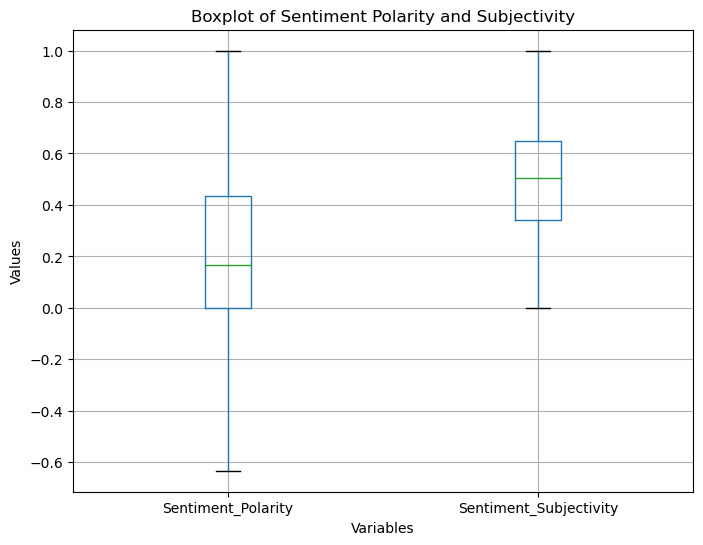

In [27]:
# Selecting numerical columns for boxplots
numerical_columns = ['Sentiment_Polarity', 'Sentiment_Subjectivity']

# Creating boxplots
user[numerical_columns].boxplot(figsize=(8, 6))
plt.title('Boxplot of Sentiment Polarity and Subjectivity')
plt.ylabel('Values')
plt.xlabel('Variables')
plt.show()

In [36]:

mdf = pd.merge(user, app, on='App', how='left')
mdf

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_to_Reviews_Ratio
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,200.803213
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,200.803213
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,200.803213
3,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,200.803213
4,10 Best Foods for You,Best way,Positive,1.000000,0.300000,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,200.803213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41078,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667,LIFESTYLE,4.1,28301.0,13.0,1000000.0,Free,0.0,Everyone,Lifestyle,2018-07-13,12.1.0,4.1 and up,35.334440
41079,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222,LIFESTYLE,4.1,28301.0,13.0,1000000.0,Free,0.0,Everyone,Lifestyle,2018-07-13,12.1.0,4.1 and up,35.334440
41080,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000,LIFESTYLE,4.1,28301.0,13.0,1000000.0,Free,0.0,Everyone,Lifestyle,2018-07-13,12.1.0,4.1 and up,35.334440
41081,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000,LIFESTYLE,4.1,28301.0,13.0,1000000.0,Free,0.0,Everyone,Lifestyle,2018-07-13,12.1.0,4.1 and up,35.334440


In [57]:
for column in mdf:
    print( "column name:", column, "- misisng values ",mdf[column].isnull().sum())
    print("------------------------------------------------------------------")

column name: App - misisng values  0
------------------------------------------------------------------
column name: Translated_Review - misisng values  0
------------------------------------------------------------------
column name: Sentiment - misisng values  0
------------------------------------------------------------------
column name: Sentiment_Polarity - misisng values  0
------------------------------------------------------------------
column name: Sentiment_Subjectivity - misisng values  0
------------------------------------------------------------------
column name: Category - misisng values  0
------------------------------------------------------------------
column name: Rating - misisng values  0
------------------------------------------------------------------
column name: Reviews - misisng values  0
------------------------------------------------------------------
column name: Size - misisng values  0
----------------------------------------------------------------

In [61]:
mdf = mdf.drop_duplicates()
mdf = mdf.dropna()
columns_to_check = ['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver', 'Installs_to_Reviews_Ratio']
mdf = mdf.dropna(subset=columns_to_check)


In [62]:
mdf.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_to_Reviews_Ratio
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,200.803213
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,200.803213
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,200.803213
3,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,200.803213
4,10 Best Foods for You,Best way,Positive,1.00,0.300000,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,200.803213


In [63]:
# One-Hot Encoding
mdf_one_hot = pd.get_dummies(mdf, columns=['Sentiment', 'Type', 'Content Rating'])

# Display the updated DataFrame
mdf_one_hot.head()


,App,Translated_Review,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Price,...,Sentiment_Negative,Sentiment_Neutral,Sentiment_Positive,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,0.0,...,False,False,True,True,False,False,False,True,False,False
1,10 Best Foods for You,This help eating healthy exercise regular basis,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,0.0,...,False,False,True,True,False,False,False,True,False,False
2,10 Best Foods for You,Works great especially going grocery store,0.40,0.875000,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,0.0,...,False,False,True,True,False,False,False,True,False,False
3,10 Best Foods for You,Best idea us,1.00,0.300000,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,0.0,...,False,False,True,True,False,False,False,True,False,False
4,10 Best Foods for You,Best way,1.00,0.300000,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,0.0,...,False,False,True,True,False,False,False,True,False,False


In [64]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assume 'mdf' is your DataFrame containing the specified columns
label_encoder = LabelEncoder()
columns_to_encode = ['Sentiment', 'Type', 'Content Rating']

# Create a new DataFrame to store the encoded values
encoded_df = mdf.copy()

# Apply LabelEncoder to specific columns and store the encoded values in the new DataFrame
for col in columns_to_encode:
    encoded_df[col + '_encoded'] = label_encoder.fit_transform(mdf[col])

# Display the updated DataFrame
print(encoded_df.head())



                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You         Works great especially going grocery store   
3  10 Best Foods for You                                       Best idea us   
4  10 Best Foods for You                                           Best way   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity            Category  \
0  Positive                1.00                0.533333  HEALTH_AND_FITNESS   
1  Positive                0.25                0.288462  HEALTH_AND_FITNESS   
2  Positive                0.40                0.875000  HEALTH_AND_FITNESS   
3  Positive                1.00                0.300000  HEALTH_AND_FITNESS   
4  Positive                1.00                0.300000  HEALTH_AND_FITNESS   

   Rating  Reviews  Size  Installs  ... Price  Con

In [65]:
# Display the DataFrame with a specific style for a more appealing output
styled_df = mdf.head().style.set_properties(**{'background-color': 'black', 
                                               'color': 'blue', 
                                               'border-color': 'green'})

styled_df


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_to_Reviews_Ratio
0,10 Best Foods for You,"I like eat delicious food. That's I'm cooking food myself, case ""10 Best Foods"" helps lot, also ""Best Before (Shelf Life)""",Positive,1.000000,0.533333,HEALTH_AND_FITNESS,4.000000,2490.000000,3.800000,500000.000000,Free,0.000000,Everyone 10+,Health & Fitness,2017-02-17 00:00:00,1.9,2.3.3 and up,200.803213
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462,HEALTH_AND_FITNESS,4.000000,2490.000000,3.800000,500000.000000,Free,0.000000,Everyone 10+,Health & Fitness,2017-02-17 00:00:00,1.9,2.3.3 and up,200.803213
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000,HEALTH_AND_FITNESS,4.000000,2490.000000,3.800000,500000.000000,Free,0.000000,Everyone 10+,Health & Fitness,2017-02-17 00:00:00,1.9,2.3.3 and up,200.803213
3,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000,HEALTH_AND_FITNESS,4.000000,2490.000000,3.800000,500000.000000,Free,0.000000,Everyone 10+,Health & Fitness,2017-02-17 00:00:00,1.9,2.3.3 and up,200.803213
4,10 Best Foods for You,Best way,Positive,1.000000,0.300000,HEALTH_AND_FITNESS,4.000000,2490.000000,3.800000,500000.000000,Free,0.000000,Everyone 10+,Health & Fitness,2017-02-17 00:00:00,1.9,2.3.3 and up,200.803213


In [66]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39677 entries, 0 to 41082
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   App                        39677 non-null  object        
 1   Translated_Review          39677 non-null  object        
 2   Sentiment                  39677 non-null  object        
 3   Sentiment_Polarity         39677 non-null  float64       
 4   Sentiment_Subjectivity     39677 non-null  float64       
 5   Category                   39677 non-null  object        
 6   Rating                     39677 non-null  float64       
 7   Reviews                    39677 non-null  float64       
 8   Size                       39677 non-null  float64       
 9   Installs                   39677 non-null  float64       
 10  Type                       39677 non-null  object        
 11  Price                      39677 non-null  float64       
 12  Content R

In [67]:
print(encoded_df.dtypes)


App                                  object
Translated_Review                    object
Sentiment                            object
Sentiment_Polarity                  float64
Sentiment_Subjectivity              float64
Category                             object
Rating                              float64
Reviews                             float64
Size                                float64
Installs                            float64
Type                                 object
Price                               float64
Content Rating                       object
Genres                               object
Last Updated                 datetime64[ns]
Current Ver                          object
Android Ver                          object
Installs_to_Reviews_Ratio           float64
Sentiment_encoded                     int32
Type_encoded                          int32
Content Rating_encoded                int32
dtype: object


In [68]:
# Impute missing values with column means (you can use other strategies like median or mode)
#encoded_df.fillna(encoded_df.mean(), inplace=True)

In [69]:
from sklearn.model_selection import train_test_split

# Assuming encoded_df contains your dataset and 'Rating' is the target variable
features = ['Sentiment_Polarity', 'Sentiment_Subjectivity', 'Reviews', 'Size', 'Installs', 'Price', 'Installs_to_Reviews_Ratio', 'Sentiment_encoded', 'Type_encoded', 'Content Rating_encoded']
target = 'Rating'


# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(encoded_df[features], encoded_df[target], test_size=0.2, random_state=42)


In [70]:

# Build the Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict ratings for the test set
y_pred = model.predict(X_test)

# Calculate model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Optionally, you can also check the model coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 0.07449838382549279
R-squared: 0.10592372609113732
Model Coefficients: [ 2.07818636e-02  6.24037909e-02  6.29446803e-10  1.08860317e-03
  4.08495375e-11 -9.08358269e-03 -3.41394057e-04  1.46558805e-02
  4.32124154e-02 -5.25293873e-03]
Intercept: 4.282509888121037


- **Sentiment Polarity**: A one-unit increase in sentiment polarity corresponds to an expected increase of approximately 0.0207 in app ratings.
- **Sentiment Subjectivity**: For every one-unit rise in sentiment subjectivity, app ratings tend to increase by about 0.0624.
- **Reviews**: Changes in the number of reviews have an almost negligible impact on app ratings, with a coefficient close to 6.29e-10.
- **Size**: A one-unit increase in app size is linked to a minimal uptick in ratings, approximately 0.0011.
- **Installs**: The number of app installs has an exceedingly tiny impact on ratings, with a coefficient of around 4.08e-11.
- **Price**: Higher prices slightly reduce app ratings, showing a coefficient of about -0.0091.
- **Installs to Reviews Ratio**: This ratio negatively influences ratings, with a coefficient of approximately -0.0003.
- **Sentiment, Type, and Content Rating Encoded Variables**: These are encoded categorical variables, and their interpretation involves understanding their impact concerning specific categories, which might not be as straightforward as numerical features.
- **Intercept Term (4.28)**: It signifies the expected average rating of an app when all other predictor variables are zero.
